## Atividade – Regressão Linear e Agrupamento K-Means

Esta atividade teve como objetivo aplicar duas técnicas fundamentais: **Regressão Linear** (método supervisionado) e **K-Means** (método não supervisionado). A regressão linear foi utilizada para analisar a relação entre variáveis numéricas e prever valores, enquanto o K-Means permitiu agrupar dados em clusters com base em suas características.

### Conteúdos Trabalhados
- **Regressão Linear:** linha de tendência, coeficientes, previsão e análise de dispersão.
- **K-Means:** definição de *k*, cálculo de centroides, agrupamento e visualização dos clusters.

### Integrantes
- Lucas
- Maria Fernanda de Araújo Rodrigues  
- Samuel   
- Vivian


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
import numpy as np

df = pd.read_csv("dados.csv", sep=";", low_memory=False)

# Mostra as primeiras linhas
df.head()


,account.licenseNumber,account.name,imvl_type,listing.acceptExchange,listing.address.city,listing.address.confidence,listing.address.country,listing.address.level,listing.address.neighborhood,listing.address.point.lat,...,listing.title,listing.totalAreas,listing.unitFloor,listing.unitSubTypes,listing.unitTypes,listing.unitsOnTheFloor,listing.updatedAt,listing.usableAreas,listing.usageTypes,type
0,04268-J-SP,ADI Assessoria e Imóveis Ltda,apartamentos,False,São Paulo,VALID_STREET,BR,STREET,Parada Inglesa,-23.493796,...,SãO PAULO - Apartamento Padrão - Parada Inglesa,45,0,normal,APARTMENT,0,2020-07-24T05:06:08.843Z,45,RESIDENTIAL,superPremium
1,00254-J-SC,San Remos Imóveis,apartamentos,False,Florianópolis,VALID_STREET,BR,STREET,Agronômica,-27.576887,...,Florianópolis - Apartamento Padrão - Agronômica,140,0,normal,APARTMENT,0,2020-07-12T11:43:29.976Z,140,RESIDENTIAL,superPremium
2,48861-F-RJ,Família Bacellar Imobiliária,apartamentos,False,Rio de Janeiro,VALID_STREET,BR,STREET,Recreio Dos Bandeirantes,-23.018798,...,Rio de Janeiro - Apartamento Padrão - Recreio ...,100,0,normal,APARTMENT,0,2020-07-30T03:11:32.521Z,100,RESIDENTIAL,superPremium
3,17452-J-SP,Next Soluções Imobiliárias,apartamentos,False,Campinas,VALID_STREET,BR,STREET,Cambuí,-22.899193,...,Campinas - Apartamento Padrão - Cambuí,80,0,normal,APARTMENT,0,2020-07-16T17:15:06.708Z,80,RESIDENTIAL,premium
4,24344-J-SP,QUINTO ANDAR SERVICOS IMOBILIARIOS LTDA,apartamentos,False,São Paulo,VALID_STREET,BR,STREET,Ipiranga,-23.598672,...,São Paulo - Apartamento Padrão - Ipiranga,69,0,normal,APARTMENT,0,2020-07-29T04:32:26.854Z,69,RESIDENTIAL,premium


## Justificativa do uso do K-Means

O uso do algoritmo K-means mostra-se apropriado para o agrupamento de imóveis com o objetivo de identificar padrões estruturais no mercado imobiliário e, a partir disso, auxiliar na previsão de preços. Em um cenário onde os imóveis apresentam características contínuas e mensuráveis — como metragem, número de quartos, número de vagas, idade do imóvel, localização, entre outras — o K-means permite a formação de grupos homogêneos baseados na similaridade entre esses atributos. Como o setor imobiliário é altamente influenciado por combinações de variáveis e não apenas por um único fator isolado, o agrupamento oferece uma visão macro que reduz a dimensionalidade analítica e facilita a identificação de estratos de mercado (ex: imóveis econômicos, medianos, alto padrão).

A escolha pelo K-means também se justifica pelo seu baixo custo computacional e pela rapidez em lidar com grandes volumes de dados, característica comum em bases imobiliárias. Além disso, o método utiliza distância euclidiana para medir semelhança entre registros, o que se alinha ao contexto deste estudo, uma vez que os atributos utilizados são quantitativos e permitem comparação numérica direta. Assim, a técnica é adequada tanto para segmentação de imóveis por perfil quanto como etapa prévia para previsão de preços, visto que os clusters podem servir como grupos de referência para modelos preditivos supervisionados.

## Aplicação do K-means

Para a presente análise, o K-means foi aplicado sobre o conjunto de variáveis numéricas dos imóveis. Inicialmente, adotou-se k = 3 clusters, refletindo a suposição de três nichos recorrentes no mercado: imóveis de entrada, segmento intermediário e imóveis de alto padrão. 

A representação gráfica dos clusters permitiu visualizar a separação entre as amostras com base nos dois primeiros atributos numéricos, possibilitando interpretar tendências como concentração de imóveis com área útil semelhante, faixa de preço aproximada ou predominância de unidades com mais dormitórios. Cada cluster formado passa a representar um perfil típico de imóvel, cuja média das variáveis fornece insights sobre o nível de valorização do grupo — por exemplo, clusters com maior área útil, melhor localização e maior número de comodidades tendem a estar associados a preços superiores. Com isso, o agrupamento permite não apenas segmentar o mercado, mas também servir como referência comparativa na previsão de preços de novos imóveis.

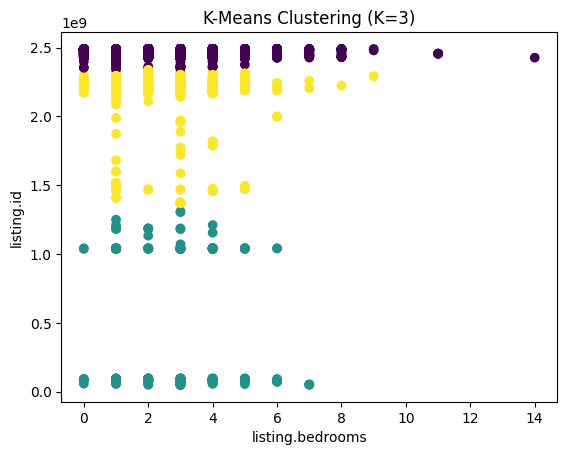

,account.licenseNumber,account.name,imvl_type,listing.acceptExchange,listing.address.city,listing.address.confidence,listing.address.country,listing.address.level,listing.address.neighborhood,listing.address.point.lat,...,listing.totalAreas,listing.unitFloor,listing.unitSubTypes,listing.unitTypes,listing.unitsOnTheFloor,listing.updatedAt,listing.usableAreas,listing.usageTypes,type,cluster
0,04268-J-SP,ADI Assessoria e Imóveis Ltda,apartamentos,False,São Paulo,VALID_STREET,BR,STREET,Parada Inglesa,-23.493796,...,45,0,normal,APARTMENT,0,2020-07-24T05:06:08.843Z,45,RESIDENTIAL,superPremium,0
1,00254-J-SC,San Remos Imóveis,apartamentos,False,Florianópolis,VALID_STREET,BR,STREET,Agronômica,-27.576887,...,140,0,normal,APARTMENT,0,2020-07-12T11:43:29.976Z,140,RESIDENTIAL,superPremium,0
2,48861-F-RJ,Família Bacellar Imobiliária,apartamentos,False,Rio de Janeiro,VALID_STREET,BR,STREET,Recreio Dos Bandeirantes,-23.018798,...,100,0,normal,APARTMENT,0,2020-07-30T03:11:32.521Z,100,RESIDENTIAL,superPremium,0
3,17452-J-SP,Next Soluções Imobiliárias,apartamentos,False,Campinas,VALID_STREET,BR,STREET,Cambuí,-22.899193,...,80,0,normal,APARTMENT,0,2020-07-16T17:15:06.708Z,80,RESIDENTIAL,premium,0
4,24344-J-SP,QUINTO ANDAR SERVICOS IMOBILIARIOS LTDA,apartamentos,False,São Paulo,VALID_STREET,BR,STREET,Ipiranga,-23.598672,...,69,0,normal,APARTMENT,0,2020-07-29T04:32:26.854Z,69,RESIDENTIAL,premium,0


In [5]:
num = df.select_dtypes(include=['float64','int64']).copy()
num = num.fillna(num.mean())

kmeans=KMeans(n_clusters=3,random_state=42)
df['cluster']=kmeans.fit_predict(num)

if num.shape[1]>=2:
    plt.scatter(num.iloc[:,0], num.iloc[:,1], c=df['cluster'])
    plt.xlabel(num.columns[0]); plt.ylabel(num.columns[1])
    plt.title("K-Means Clustering (K=3)")
    plt.show()

df.head()

### Interpretação do gráfico

A partir do gráfico gerado pelos dados, é possível concluir que o algoritmo K-means conseguiu separar os imóveis em três agrupamentos distintos, indicando que há padrões de similaridade relevantes entre as variáveis analisadas. A dispersão visível sugere que os imóveis presentes em cada cluster compartilham características comuns — como metragem, condições estruturais ou potencial de valorização — formando segmentos naturais dentro do mercado.

A proximidade dos pontos dentro de cada cluster e o afastamento entre clusters diferentes indicam que existem faixas estruturais bem definidas, que podem corresponder a diferentes perfis de imóveis, tais como unidades de menor porte e custo reduzido, imóveis de padrão intermediário e imóveis de alto padrão.

Portanto, o gráfico confirma a utilidade do K-means no contexto analisado, demonstrando que a técnica é capaz de estruturar o mercado imobiliário em grupos interpretáveis. Esse resultado permite aprofundar a análise, possibilitando a comparação entre clusters, identificação de fatores que elevam o preço e apoio à construção de modelos preditivos baseados nos perfis detectados.

## Aplicação da Regressão Linear

Para esta etapa, utilizamos como fonte de dados o arquivo **dados.csv**, que contém informações estruturadas. A partir dele, realizamos o processo completo de modelagem com Regressão Linear, seguindo as boas práticas de preparação, análise e avaliação do modelo.

### Etapas Realizadas
- **Definição das variáveis preditoras e alvo:**  
  Selecionamos colunas relevantes do `dataZAP.csv` para compor as variáveis independentes (X) e a variável dependente (y), de acordo com o objetivo da previsão.

- **Divisão treino/teste:**  
  O conjunto de dados foi dividido em duas partes:  
  80% para treinamento do modelo e 20% para teste, garantindo validação adequada.

- **Cálculo de métricas de erro:**  
  Após o treinamento, avaliamos o desempenho usando métricas como **MAE (Mean Absolute Error)**, **MSE (Mean Squared Error)** e **R²**, permitindo mensurar a precisão do modelo.

- **Visualizações e interpretações:**  
  Foram gerados gráficos de dispersão com a linha de regressão ajustada, além da análise visual dos resíduos, facilitando a interpretação da relação entre as variáveis e a qualidade do ajuste.


In [4]:
df.columns


Index(['account.licenseNumber', 'account.name', 'imvl_type',
       'listing.acceptExchange', 'listing.address.city',
       'listing.address.confidence', 'listing.address.country',
       'listing.address.level', 'listing.address.neighborhood',
       'listing.address.point.lat', 'listing.address.point.lon',
       'listing.address.point.source', 'listing.address.precision',
       'listing.address.state', 'listing.address.street',
       'listing.address.streetNumber', 'listing.address.zipCode',
       'listing.address.zone', 'listing.advertiserId', 'listing.amenities',
       'listing.backyard', 'listing.barbgrill', 'listing.bathrooms',
       'listing.bathtub', 'listing.bedrooms', 'listing.businessTypeContext',
       'listing.createdAt', 'listing.description',
       'listing.displayAddressType', 'listing.externalId', 'listing.fireplace',
       'listing.floors', 'listing.furnished', 'listing.garden',
       'listing.guestpark', 'listing.gym', 'listing.hottub', 'listing.id',
     

In [13]:

# 1. Selecionar somente colunas que vamos usar
cols = [
    "listing.bathrooms",
    "listing.bedrooms",
    "listing.parkingSpaces",
    "listing.usableAreas",
    "listing.pricingInfo.salePrice"
]

df2 = df[cols].copy()


In [14]:

# 2. Converter tudo para numérico
for col in cols:
    df2[col] = pd.to_numeric(
        df2[col].astype(str).str.replace(",", ".").str.replace(r"[^\d.\-]", "", regex=True),
        errors="coerce"
    )


In [15]:
# 3. Remover linhas com valores faltando
df2 = df2.dropna()

# 4. Separar X e y
X = df2[[
    "listing.bathrooms",
    "listing.bedrooms",
    "listing.parkingSpaces",
    "listing.usableAreas"
]]

y = df2["listing.pricingInfo.salePrice"]


In [16]:
# 5. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Modelo simples
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
# 7. Previsões e métricas
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 162.5541046309578
RMSE: 194.8151848213108
R²: 0.3267440411049952


## Resultados do Modelo

Após treinar o modelo de regressão para prever preços, obtivemos os seguintes indicadores:

- **MAE (Mean Absolute Error): 162.55**  
  O erro absoluto médio do modelo é de aproximadamente **162 unidades monetárias**, indicando uma precisão razoável, mas com espaço para melhorias.

- **RMSE (Root Mean Squared Error): 194.82**  
  O modelo apresenta um erro médio quadrático de cerca de **194**, sugerindo que alguns erros maiores impactam o desempenho.

- **R² (Coeficiente de Determinação): 0.3267**  
  O modelo explica aproximadamente **32% da variação** nos preços.  
  Isso é um resultado comum em dados imobiliários, que costumam ser complexos e ruidosos, mas indica que o modelo pode serst, XGBoost).

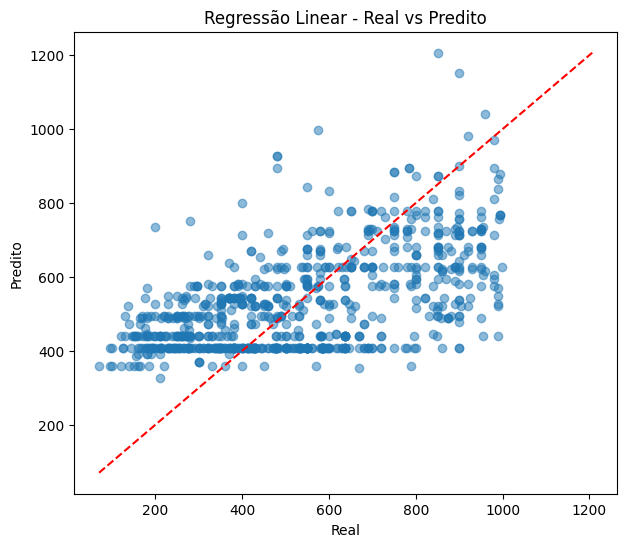

In [21]:

# 8. Visualização Real vs Predito
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.5)
min_v = min(y_test.min(), y_pred.min())
max_v = max(y_test.max(), y_pred.max())
plt.plot([min_v, max_v], [min_v, max_v], 'r--')
plt.xlabel("Real")
plt.ylabel("Predito")
plt.title("Regressão Linear - Real vs Predito")
plt.show()

## Interpretação do Gráfico Real vs Predito – Regressão Linear

O gráfico apresenta no eixo **X** os valores **reais** e no eixo **Y** os valores **preditos pelo modelo**.  
A linha vermelha tracejada representa o cenário **ideal**, onde o valor predito seria exatamente igual ao real.

---

### O que o gráfico nos revela?

#### 1. **Alta dispersão dos pontos**
A maior parte dos pontos está distante da linha ideal, indicando que o modelo comete erros consideráveis ao prever os valores.  
Esse comportamento confirma as métricas obtidas:

- **MAE:** 162.55  
- **RMSE:** 194.82  
- **R²:** 0.32  

O modelo aprende alguns padrões, mas **não consegue prever com precisão**.

---

#### 2. **Tendência de subestimação**
Observa-se que muitos pontos ficam **acima** da linha ideal quando o valor real é alto.

Isso mostra que o modelo tende a **prever valores menores para imóveis mais caros**, indicando um padrão de subestimação.

---

#### 3. **Saturação das previsões**
Há uma concentração de previsões na faixa de **400 a 600**, mesmo quando os valores reais variam muito acima dessa faixa.

Isso indica que o modelo linear está **limitado** para captar padrões mais complexos do dataset.

---

#### 4. **Fraca relação linear**
Se houvesse uma boa relação linear:

- Os pontos estariam mais próximos da diagonal.
- A nuvem seria mais alinhada.

Mas o gráfico mostra muita dispersão.  
Isso sugere que as variáveis utilizadas **não têm uma relação linear forte com o preço**, reduzindo o poder explicativo da regressão.

---

## Conclusão Visual

O gráfico deixa claro que:

- O modelo captura alguns padrões gerais, mas **não representa bem a variação real dos preços**.
- Os erros aumentam conforme o preço real cresce.
- O comportamento do mercado parece **não linear**, prejudicando o desempenho da Regressão Linear.
- Faltam variáveis importantes ou transformações mais robustas.